<a href="https://colab.research.google.com/github/wilsonfmjr/PPGEEC2321---REDES-NEURAIS-E-DEEP-LEARNING/blob/main/Questao_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

#Geração dos dados

In [ ]:
# Gerar dados a partir das quatro distribuições gaussianas
N = 1000

mean1 = np.array([0, 0, 0, 0, 0, 0, 0, 0])
mean2 = np.array([4, 0, 0, 0, 0, 0, 0, 0])
mean3 = np.array([0, 0, 0, 4, 0, 0, 0, 0])
mean4 = np.array([0, 0, 0, 0, 0, 0, 0, 4])

data1 = np.random.randn(N, 8) + mean1
data2 = np.random.randn(N, 8) + mean2
data3 = np.random.randn(N, 8) + mean3
data4 = np.random.randn(N, 8) + mean4

X = np.vstack((data1, data2, data3, data4))
y = np.array([0]*N + [1]*N + [2]*N + [3]*N)

#Partição do banco de dados

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Definição e treinamento do autoencoder

In [ ]:
# Definir e treinar o autoencoder
input_dim = X_train.shape[1]
encoding_dim = 2  # Dimensão desejada

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3570 - val_loss: 2.3192
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3157 - val_loss: 2.2048
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.1776 - val_loss: 2.0909
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0743 - val_loss: 2.0354
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0061 - val_loss: 1.9952
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9659 - val_loss: 1.9804
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9770 - val_loss: 1.9714
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.9520 - val_loss: 1.9607
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9581 - val_loss: 1.9483
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9105 - val_loss: 1.9267
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8911 - val_loss: 1.8985
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8709 - val

#Projeção dos dados em duas dimensões

In [ ]:
# Projetar os dados para o novo espaço de dimensão 2
X_encoded = encoder.predict(X)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step


#Visualização dos dados em duas dimensões

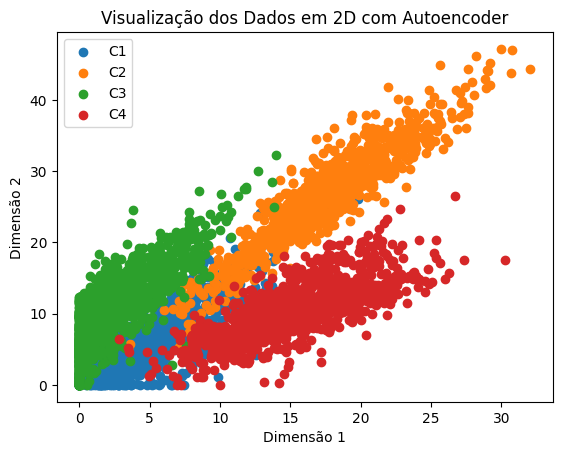

In [ ]:
# Visualizar os dados no novo espaço de dimensão 2
#plt.figure(figsize=(10, 8))
plt.scatter(X_encoded[y == 0, 0], X_encoded[y == 0, 1], label='C1')
plt.scatter(X_encoded[y == 1, 0], X_encoded[y == 1, 1], label='C2')
plt.scatter(X_encoded[y == 2, 0], X_encoded[y == 2, 1], label='C3')
plt.scatter(X_encoded[y == 3, 0], X_encoded[y == 3, 1], label='C4')
plt.legend()
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.title('Visualização dos Dados em 2D com Autoencoder')
plt.show()